In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

Atrain= pd.read_csv("train.csv")
Btest= pd.read_csv("test.csv")
print ("train data shape :", Atrain.shape)
print ("test data shape :", Btest.shape)
Atrain.head(5)

train data shape : (1460, 81)
test data shape : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
Btest.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
Atrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Priyanka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


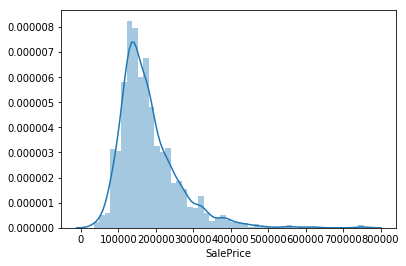

In [4]:
sns.distplot(Atrain['SalePrice']);

In [5]:
print("Skewness: %f" % Atrain['SalePrice'].skew())
print("Kurtosis: %f" % Atrain['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


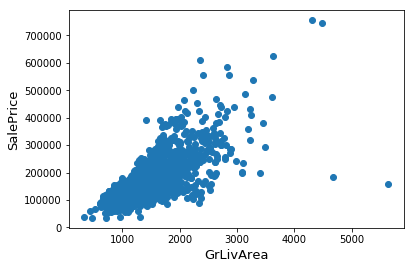

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = Atrain['GrLivArea'], y = Atrain['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu= 180921.20 and sigma= 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

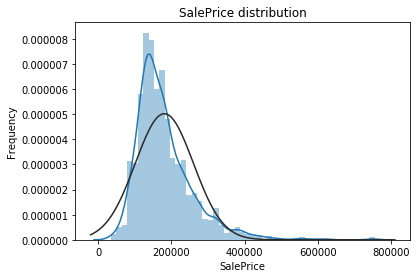

In [7]:
sns.distplot(Atrain['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(Atrain['SalePrice'])
print( '\n mu= %.2f and sigma= %.2f\n'% (mu, sigma))
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

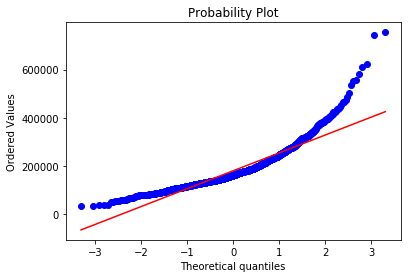

In [8]:
fig = plt.figure()
res = stats.probplot(Atrain['SalePrice'], plot=plt)
plt.show()

In [9]:
numeric_features=Atrain.select_dtypes(include=[np.number])
corr=numeric_features.corr()
print (corr['SalePrice'].sort_values (ascending=False)[:5], '\n' )
print (corr['SalePrice'].sort_values (ascending=False)[-5:], '\n' )

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



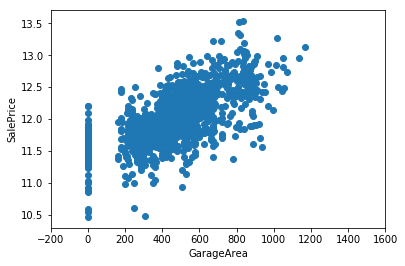

In [10]:
Atrain= Atrain[Atrain['GarageArea']<1200]
plt.scatter(x=Atrain['GarageArea'], y=np.log(Atrain.SalePrice))
plt.xlim(-200,1600)
plt.ylabel ('SalePrice')
plt.xlabel("GarageArea")
plt.show()

In [11]:
x = pd.DataFrame(Atrain.isnull().sum().sort_values(ascending =False)[:25])
x.column = ['null count']
x.index.name = 'Features'
print (x)

                 0
Features          
PoolQC        1449
MiscFeature   1402
Alley         1364
Fence         1174
FireplaceQu    689
LotFrontage    258
GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
Utilities        0
YearRemodAdd     0
MSSubClass       0
Foundation       0
ExterCond        0
ExterQual        0


C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [12]:
categoricals = Atrain.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Fa  MnPrv   
freq    

In [13]:
print ("original : \n")
print (Atrain.Street.value_counts(), "\n")

print ("\n")

Atrain ['enc_street']= pd.get_dummies(Atrain.Street, drop_first=True)
Btest ['enc_street']= pd.get_dummies(Atrain.Street, drop_first=True)
print ("encoded : \n")
print (Atrain.enc_street.value_counts(), "\n")

original : 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



encoded : 

1    1450
0       5
Name: enc_street, dtype: int64 



In [14]:
data= Atrain.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum()!=0))
y=np.log(Atrain.SalePrice)
x=data.drop(['SalePrice', 'Id'], axis=1)

0


In [15]:
x_Atrain, x_Btest, y_Atrain, y_Btest= train_test_split(x,y,random_state=12, test_size=.33)
lr=LinearRegression()
model=lr.fit(x_Atrain,y_Atrain)

In [16]:
print ('R^2 \n',model.score(x_Btest,y_Btest))
prediction=model.predict(x_Btest)
print ('RMSE \n',mean_squared_error(y_Btest,prediction)) 

R^2 
 0.859363890967731
RMSE 
 0.023015830531984114


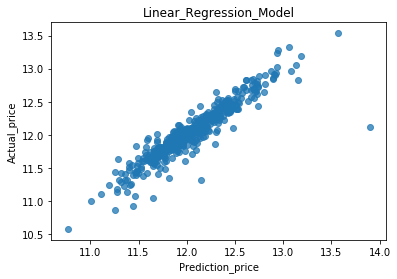

In [17]:
actual_value=y_Btest
plt.scatter(prediction, actual_value, alpha=.75)
plt.xlabel("Prediction_price")
plt.ylabel("Actual_price")
plt.title("Linear_Regression_Model")
plt.show()

In [18]:
submission=pd.DataFrame()

In [19]:
submission['Id']=Btest.Id

In [20]:
feats=Btest.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()


In [21]:
prediction=model.predict(feats)

In [25]:
print("original_prediction:", prediction[:10], "\n")


original_prediction: [11.73880215 11.7014654  12.06410869 12.17799123 12.09241947 12.04107005
 12.13774257 11.99156098 12.17833995 11.66280365] 



In [26]:
final_prediction=np.exp(prediction)

In [27]:
print ("final_Prediction :", final_prediction[:10])

final_Prediction : [125342.10860495 120748.53014803 173530.50556576 194461.84101153
 178513.49345969 169578.30125025 186790.42930921 161387.07992684
 194529.66513218 116169.27180907]


In [28]:
submission['SalePrice']=final_prediction

In [29]:
print(submission.head())

     Id      SalePrice
0  1461  125342.108605
1  1462  120748.530148
2  1463  173530.505566
3  1464  194461.841012
4  1465  178513.493460


In [30]:
submission.to_csv("submissionnew.csv", index=False)

In [ ]:
print(submission.head())

In [ ]:
submission.to_csv('submission1.csv', index=False)